# Grip : The Spark Foundation
## DATA SCIENCE AND BUSINESS ANALYTICS TASKS
### TASK 06 Prediction using Decision Tree algorithm
### Author : PRAJWAL N

#### In this task we have to predict using Decision Tree algorithm and visualize it graphically

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

#### Importing the dataset

In [2]:
data = pd.read_csv("C:\\Users\\PRAJJU\\Desktop\\GL EXERCISES\\The Spark Foundation\\Task 2\\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Cleaning and Understanding the charateristics of the dataset

In [4]:
data.shape

(150, 6)

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data["Species"] = data["Species"].replace(("Iris-setosa", "Iris-versicolor", "Iris-virginica"), (0, 1, 2))

In [11]:
data = data.drop("Id",axis=1)

In [12]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
data.iloc[76:77]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
76,6.8,2.8,4.8,1.4,1


#### Visualizing the dataset for better understanding of the datset

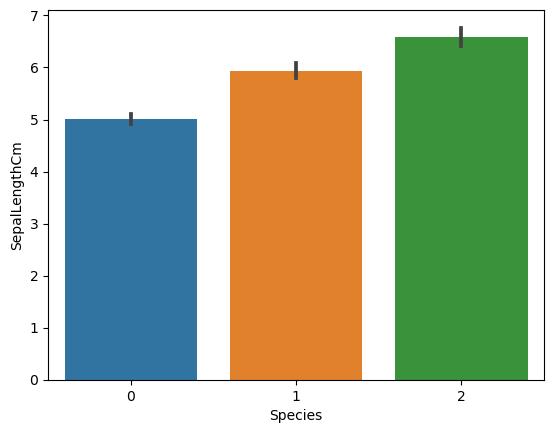

In [14]:
sns.barplot(x=data["Species"],y=data["SepalLengthCm"])
plt.show()

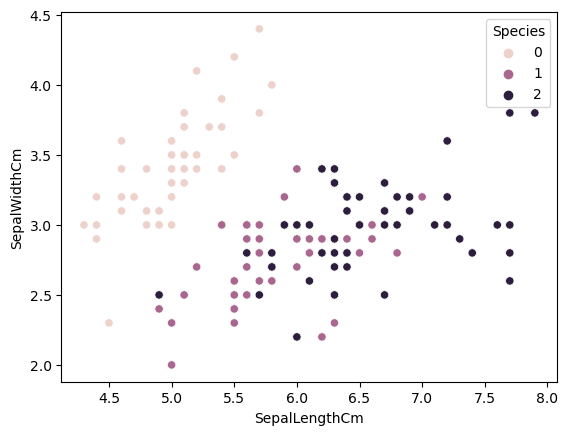

In [15]:
sns.scatterplot(data=data,x="SepalLengthCm",y="SepalWidthCm",hue="Species")
plt.show()

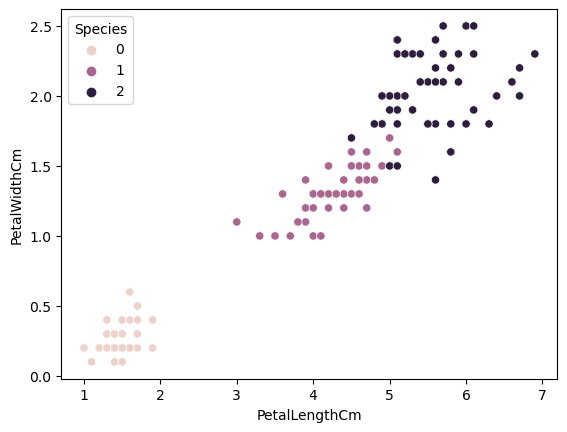

In [16]:
sns.scatterplot(data=data,x="PetalLengthCm",y="PetalWidthCm",hue="Species")
plt.show()

#### Evaluating the Model

In [17]:
X = data.drop("Species",axis=1)
y = data["Species"]

In [18]:
X_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(x_test)

#### Predicting the Model

In [21]:
new_data = {
    'SepalLengthCm': [5.2],
    'SepalWidthCm': [3.8],
    'PetalLengthCm': [1.6],
    'PetalWidthCm': [0.3]
}

In [22]:
new_df = pd.DataFrame(new_data)
prediction = dt.predict(new_df)
if prediction == 0:
    print("The species is Iris-setosa")
elif prediction == 1:
    print("The species is Iris-versicolor")
else:
    print("The species is Iris-virginica")

The species is Iris-setosa


In [23]:
new_data1 = {
    'SepalLengthCm': [6.2],
    'SepalWidthCm': [3.8],
    'PetalLengthCm': [5.6],
    'PetalWidthCm': [2.3]
}

In [24]:
new_df1 = pd.DataFrame(new_data1)
prediction1 = dt.predict(new_df1)
if prediction1 == 0:
    print("The species is Iris-setosa")
elif prediction1 == 1:
    print("The species is Iris-versicolor")
else:
    print("The species is Iris-virginica")

The species is Iris-virginica


In [25]:
new_data2 = {
    'SepalLengthCm': [6.2],
    'SepalWidthCm': [2.8],
    'PetalLengthCm': [4.6],
    'PetalWidthCm': [1.3]
}

In [26]:
new_df2 = pd.DataFrame(new_data2)
prediction2 = dt.predict(new_df2)
if prediction2 == 0:
    print("The species is Iris-setosa")
elif prediction2 == 1:
    print("The species is Iris-versicolor")
else:
    print("The species is Iris-virginica")

The species is Iris-versicolor


In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

#### Visualizing the Decision Tree graphically

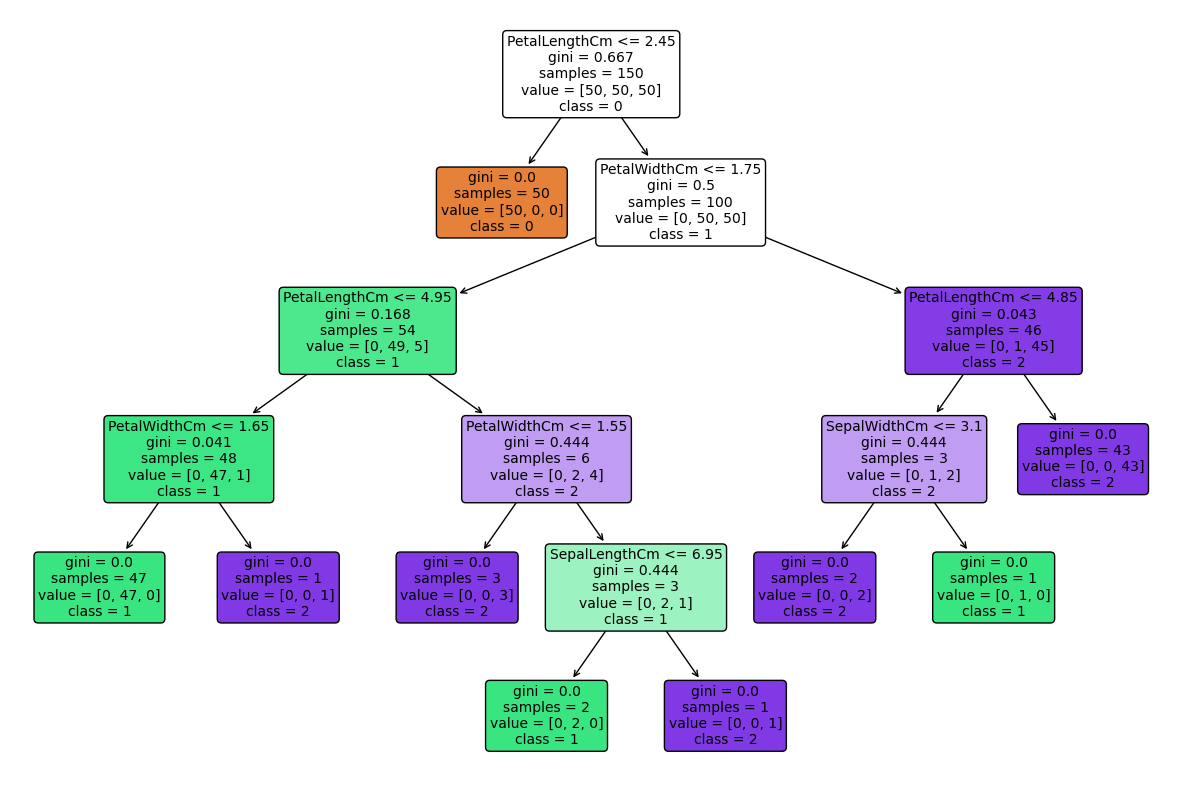

In [28]:
# Convert class names to strings
class_names = data['Species'].unique().astype(str)
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.show()

## Thank You